Introduction 
===

In this notebook we will study the different discrete approximations of curvatures in an idealised capillary rise experiment modelled using the Young-Laplace equation. The idealised geometry of the problem allows for a more exact study of numerical errors by comparisons to the solution from the predefined geometry:

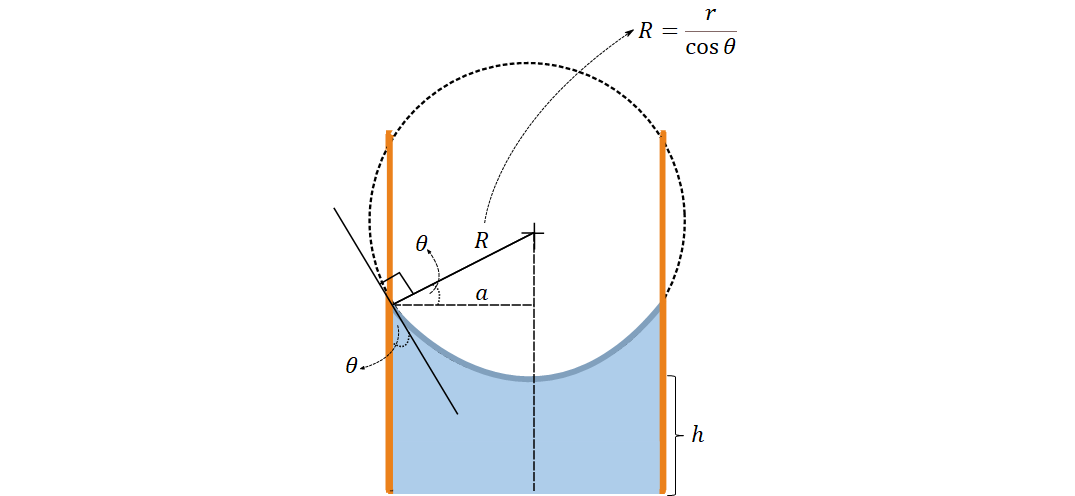


The Young-Laplace has an exact analytical solution $\Delta p$, related to the radius of the oscullating circle $R$:

$$
\Delta p=-\gamma H_{f}=-\gamma\left(\frac{1}{R_{1}}+\frac{1}{R_{2}}\right)=\frac{2 \gamma}{R}
$$


The purpose of this study is thus to find discretised approximiations of $H_{f} = \frac{2}{R}$ in order to provide insights into how we can compute numerical accuracies when simulating non-ideal systems. We use the following nomenclature and conventions throughout (from the course notes of Keenan Crane (https://brickisland.net/DDGSpring2020) (CC 4.0))


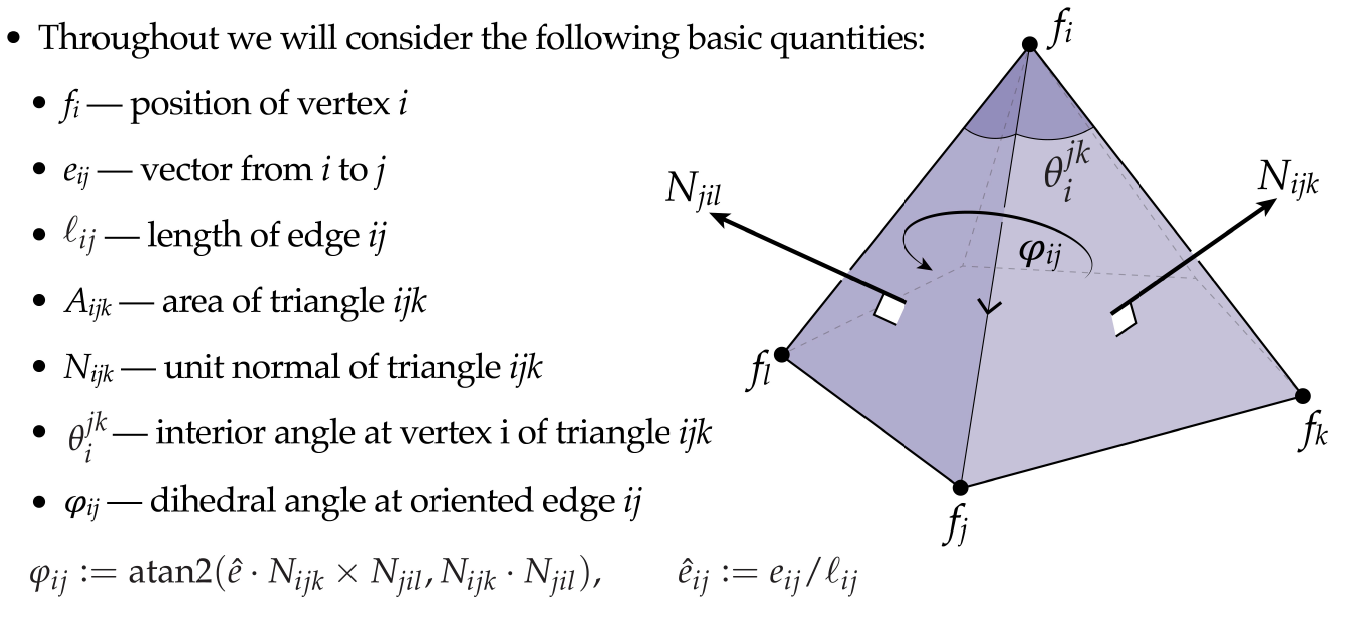

From the same notes the following overview of all discrete approximations and their relation to the smooth curvature definitions is also provided:

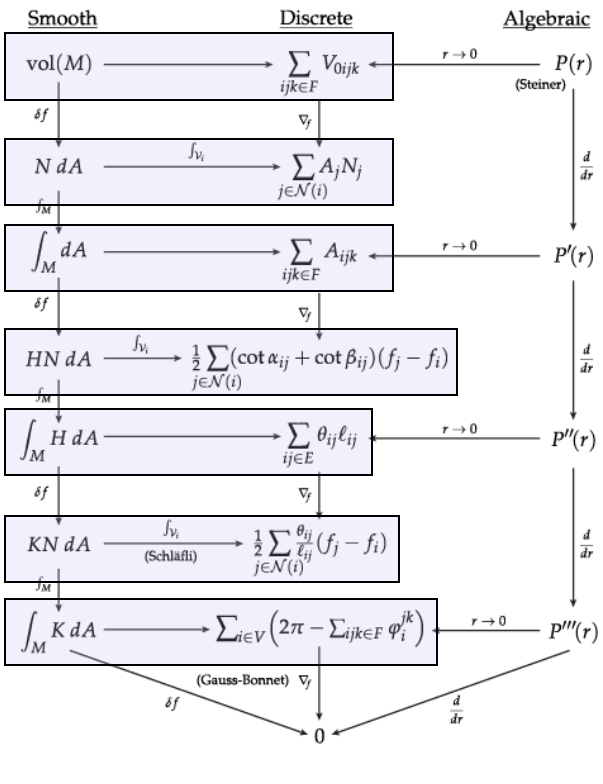


### We consider the following definitions for *vector curvatures*:

Gaussian normal curvature: $$\mathrm{KNdA} = \frac{1}{2} \sum_{i j \in \mathrm{St}(i)} \frac{\varphi_{i j}}{\ell_{i j}}\left(f_{j}-f_{i}\right)$$
Mean normal curvature: $$H N dA = \frac{1}{2} \sum_{i j \in \mathrm{St}(i)}\left(\cot \alpha_{i j}+\cot \beta_{i j}\right)\left(f_{i}-f_{j}\right)$$
Area: $$N d A = \frac{1}{6} \sum_{i j k \in \mathrm{St}(i)} f_{j} \times f_{k}$$
Volume: (No Hodge dual in $\mathbb{R}^3$; scalar values only)


### ...and the following definitions for *scalar curvatures*:

Gaussian curvature (angle defect): $$ \Omega_{i}:=2 \pi-\sum_{i j k} \theta_{i}^{j k}$$
Mean curvature: $$H_{i j}:=\frac{1}{2} \ell_{i j} \varphi_{i j}$$
Area: $$A_{i j k}$$
Volume: $$V_{i j k}$$

### The Gaussian and mean curvatures are related to each other through the principle curvatures:

Gaussian: $K=\kappa_{1} \kappa_{2}$

Mean: $H=\frac{\kappa_{1}+\kappa_{2}}{2}$

Since we know that $\kappa_{1} = \kappa_{2} $ we have $K=\kappa_{1}^2$ so 

$$
H=\frac{\sqrt{K}+\sqrt{K}}{2}
$$

The principle curvatures in the smooth setting are defined by:

$$
\begin{array}{l}
\kappa_{1}=H-\sqrt{H^{2}-K} \\
\kappa_{2}=H+\sqrt{H^{2}-K}
\end{array}
$$

The discrete principle curvatures can be found from

$$\frac{H_{i}}{A_{i}} \pm \sqrt{\left(\frac{H_{i}}{A_{i}}\right)^{2}-\frac{K_{i}}{A_{i}}}$$

Where the vertex normal curvature $H_{i}:=\frac{1}{4} \sum_{i j \in E} \ell_{i j} \varphi_{i j}$ is normalized over the area of the dual cell $A_{i}:=\left|C_{i}\right|$:

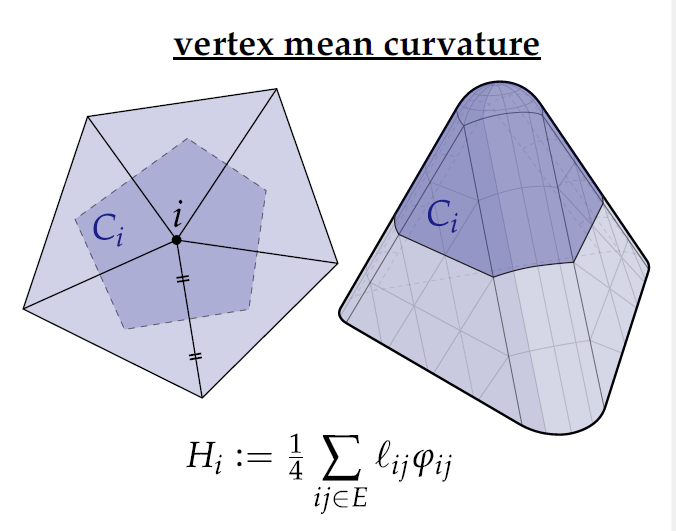

### ...finally the algebraic perpective allows us to compute curvatures from the Steiner polynomials (of a mollified surface):

$$
\text { volume }_{\varepsilon}(f)=V_{0}+\varepsilon \sum_{i j k \in F} A_{i j k}+\varepsilon^{2} \sum_{i j \in E} \ell_{i j} \varphi_{i j}+\varepsilon^{3} \sum_{i \in V} \Omega_{i}
$$

$$
\begin{array}{l}
\frac{d}{d \varepsilon} \text { volume }_{\varepsilon}=\text { area }_{\varepsilon} \\
\frac{d}{d \varepsilon} \text { area }_{\varepsilon}=\operatorname{mean}_{\varepsilon} \\
\frac{d}{d \varepsilon} \operatorname{mean}_{\varepsilon}=\text { Gauss }_{\varepsilon} \\
\frac{d}{d \varepsilon} \text { Gauss }_{\varepsilon}=0
\end{array}
$$

# Other notes:

#### Notes on the angle defect in the plane:

An equality that holds only when there is no curvature

$$2 \pi-\sum_{i} \theta_{i}=\frac{1}{6} \pi \varepsilon^{2} K$$

which was derived from the relation of ratios between spheres/balls of radius $\varepsilon$:

$$\frac{\varepsilon^{2}}{12} K \approx 1-\frac{\left|B_{g}(\varepsilon)\right|}{\left|B_{\mathbb{R}^{2}}(\varepsilon)\right|}$$

so that demonstrates how this equality is the integrated Gaussian curvature and this integral is the same for slight variations of $\varepsilon$. In the future we will study if it is possible to recover exact rations for different values of $\varepsilon$ by studying how exactly the area ratios vary. 

In the Extrinsic viewpoint the angle defect $\Omega$ becomes the integrated area on the unit sphere, the shaded are shown in this figure:


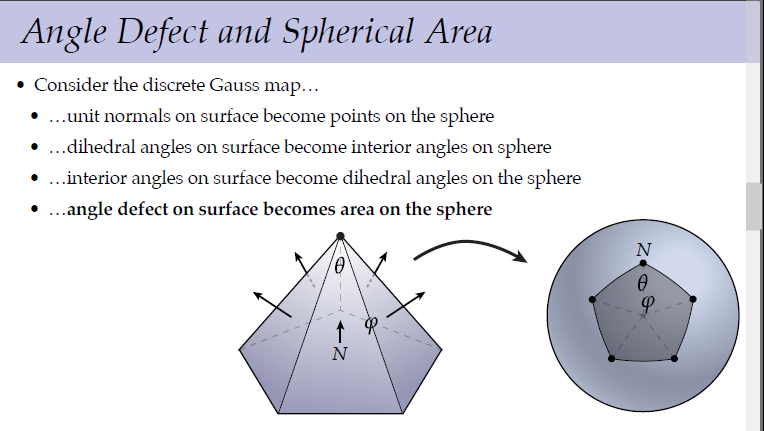



Discrete Gauss Bonnet Theorem:

$$\sum_{i \in \mathrm{int} V} \Omega_{i}+\sum_{i \in \partial V} \kappa_{i}=2 \pi \chi$$

where the boundary vertices are
$$\kappa_{i}:=\pi-\sum_{i j k} \theta_{i}^{j k}$$


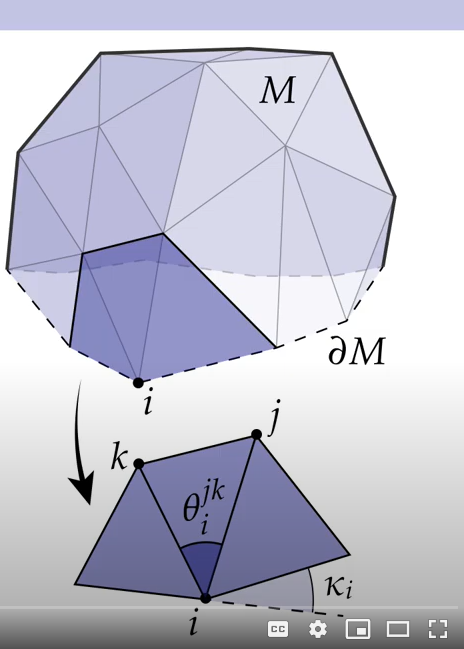


Cotan is the ratio of dual to primal cells:

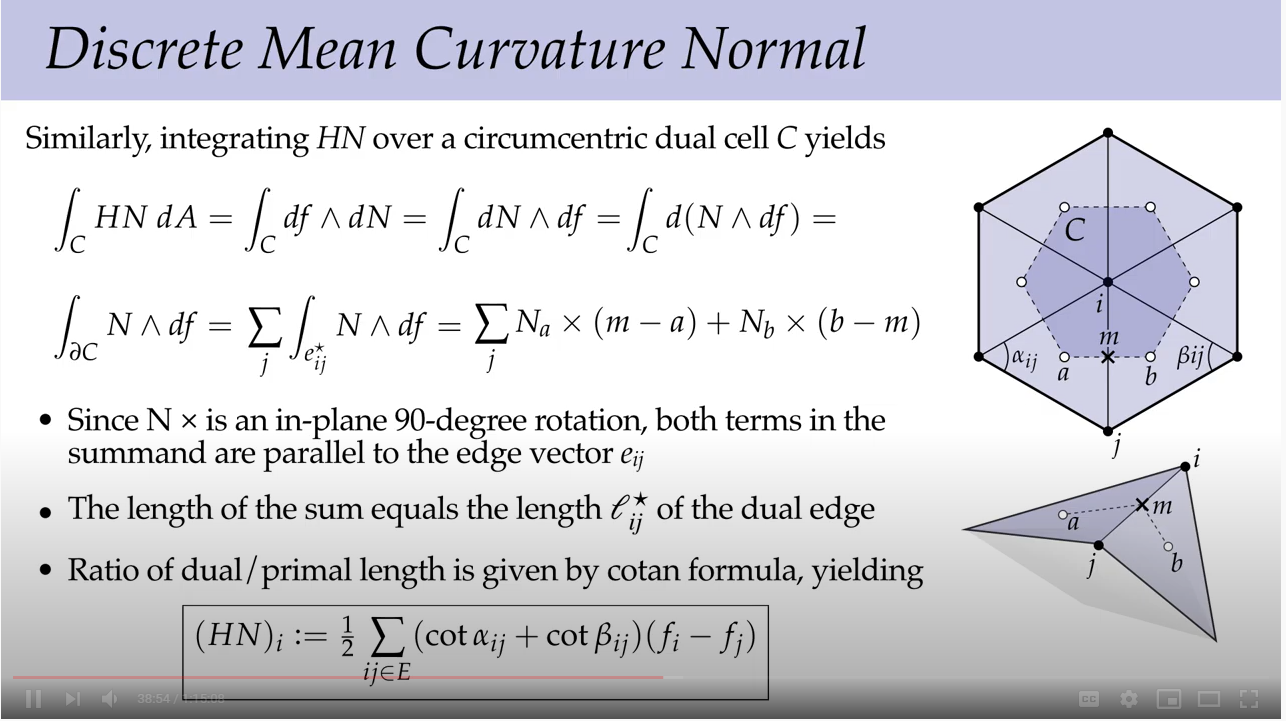

In [1]:
# Imports and physical parameters
import numpy as np
import scipy
import matplotlib.pyplot as plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
%matplotlib notebook

# Parameters for a water-filled glass tube in air at standard laboratory conditions,
gamma = 0.0728  # N/m, surface tension of water at 20 deg C
rho = 1000  # kg/m3, density
g = 9.81  # m/s2

from ddgclib import *
#from ddgclib.curvatures import plot_surface, curvature

In [2]:
Complex

ddgclib._complex.Complex

In [3]:
Arrow3D

ddgclib._curvatures.Arrow3D

In [4]:
# Example calculation with the minimum discretisation
r = 1
THETA = np.linspace(0, 2*np.pi)
THETA = np.linspace(0, np.pi)
#theta = 20 *np.pi/180

H_i = []
H_ij_sum = []
K = []
K = []
K_f = []
H_f = []
HNdA_ij_sum = []
c_outd_list = []

for theta in THETA:
    # Compute discrete curvatures
    F, nn, K_f_theta, H_f_theta = cap_rise_init(r, theta, gamma, boundary_vertices=4, refinement=0)
    
    # Save results
    K_f.append(K_f_theta)
    H_f.append(H_f_theta)
    c_outd = curvatures(F, nn)
    c_outd['K_f'] = K_f
    c_outd['H_f'] = H_f
    H_i.append(c_outd['H_i'])
    H_ij_sum.append(c_outd['H_ij_sum'])
    HNdA_ij_sum.append(np.sum(c_outd['HNdA_ij']))
    K.append(c_outd['K'])    
    c_outd_list.append(c_outd)
"""
dict_keys(['F', 'nn', 'n_i', 'E_ij', 'E_jk', 'E_ik', 'hat_E_ij', 'L_ij', 'Varphi_ij',
'mdp_ij', 'mdp_ik', 'j_k', 'j_l', 'Theta_i_jk', 'Wedge_ij_ik', 'A_ijk', 'N_ijk', 'N_ijl', 
'C_ijk', 'KNdA_ij', 'HNdA_ij', 'NdA_ij', 'H_ij', 'V_ijk', 'i', 'j', 'k', 'l', 'wedge_ij_ik',
'a_ijk', 'n_ijk', 'wedge_ij_il', 'a_ijl', 'n_ijl', 'arg1', 'arg2', 'varphi_ij', 'c', 'a', 'b', 
'alpha_ij', 'beta_ij', 'theta_i_jk', 'A', 'v_dual', 'h_ij', 'b_ij', 'C_ij', 'h_ik', 'b_ik', 'C_ik', 
'KNdA_i', 'HNdA_i', 'HN_i', 'NdA_i', 'Omega_i', 'K', 'H_i', 'H_ij_sum', 'K_f', 'H_f'])
"""
H_i = np.array(H_i)
H_ij_sum = np.array(H_ij_sum)
# Exact hydrostatics
dp_exact = H_f_theta * gamma
X = THETA*180/np.pi
help(plot_variables)

Help on function plot_variables in module ddgclib._curvatures:

plot_variables(X, vdict, xlabel='Contact angle $\\theta$', ylabel='-')



In [5]:
# H / (np.sqrt(np.array(z/r))) /r**2 

<IPython.core.display.Javascript object>


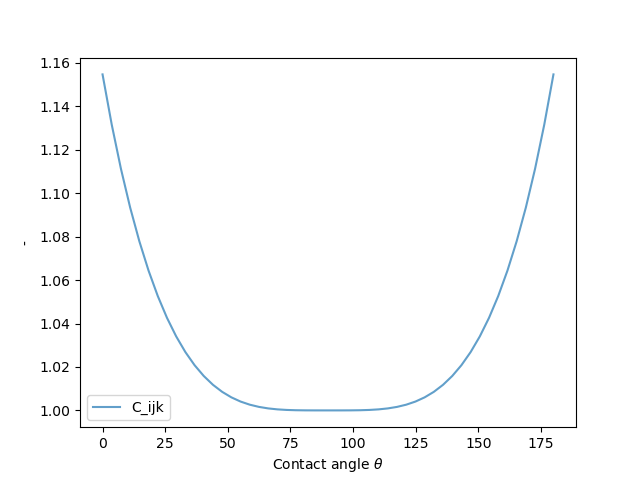

In [6]:
A_ijk = []
C_ijk = []
for c_outd in c_outd_list:
    A_ijk.append(np.sum(c_outd['A_ijk']))
    C_ijk.append(np.sum(c_outd['C_ijk']))
    
#vdict = {'100*2*H_ij_sum*C_ijk/A_ijk-H_f error':100*abs(2*np.array(H_ij_sum)*np.array(C_ijk)/A_ijk-H_f)/H_f }
vdict = {#'A_ijk/C_ijk': np.array(A_ijk)/C_ijk,
         'C_ijk': C_ijk
        }
plot_variables(X, vdict)

In [7]:
np.array(A_ijk)/C_ijk, C_ijk/np.array(A_ijk)

(array([3.        , 2.93592978, 2.87212284, 2.80884137, 2.74634542,
        2.68489178, 2.624733  , 2.56611626, 2.50928245, 2.4544651 ,
        2.40188947, 2.3517716 , 2.30431745, 2.259722  , 2.21816852,
        2.17982775, 2.14485724, 2.11340069, 2.08558738, 2.06153158,
        2.04133215, 2.02507209, 2.01281822, 2.00462089, 2.00051378,
        2.00051378, 2.00462089, 2.01281822, 2.02507209, 2.04133215,
        2.06153158, 2.08558738, 2.11340069, 2.14485724, 2.17982775,
        2.21816852, 2.259722  , 2.30431745, 2.3517716 , 2.40188947,
        2.4544651 , 2.50928245, 2.56611626, 2.624733  , 2.68489178,
        2.74634542, 2.80884137, 2.87212284, 2.93592978, 3.        ]),
 array([0.33333333, 0.3406076 , 0.34817452, 0.35601868, 0.36412026,
        0.37245449, 0.38099113, 0.38969396, 0.3985203 , 0.40742075,
        0.41633889, 0.42521136, 0.43396798, 0.44253231, 0.45082238,
        0.45875185, 0.4662315 , 0.47317104, 0.47948123, 0.48507625,
        0.48987618, 0.49380958, 0.49681585, 0.

<IPython.core.display.Javascript object>


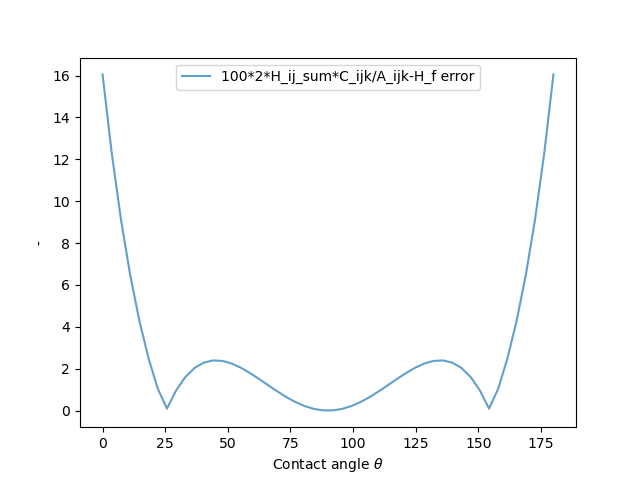

In [8]:
A_ijk = []
C_ijk = []
for c_outd in c_outd_list:
    A_ijk.append(np.sum(c_outd['A_ijk']))
    C_ijk.append(np.sum(c_outd['C_ijk']))
    
vdict = {'100*2*H_ij_sum*C_ijk/A_ijk-H_f error':100*abs(2*np.array(H_ij_sum)*np.array(C_ijk)/A_ijk-H_f)/H_f }
plot_variables(X, vdict)

<IPython.core.display.Javascript object>


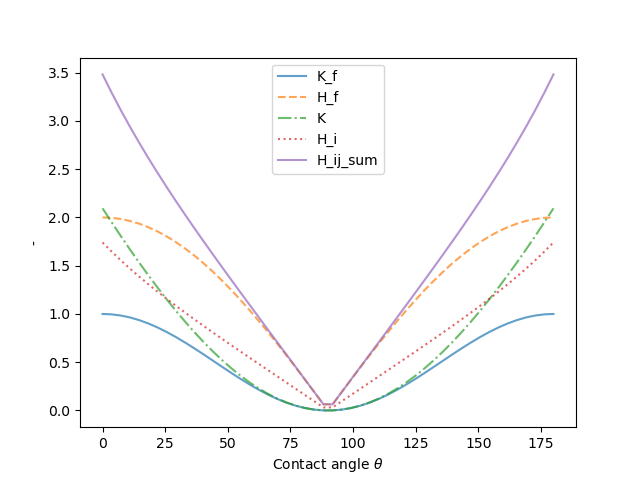

In [9]:
vdict = {'K_f': K_f,
         'H_f': H_f,
         'K': K,
         'H_i': H_i,
         'H_ij_sum': H_ij_sum
         }
plot_variables(X, vdict, xlabel=r'Contact angle $\theta$')

<IPython.core.display.Javascript object>


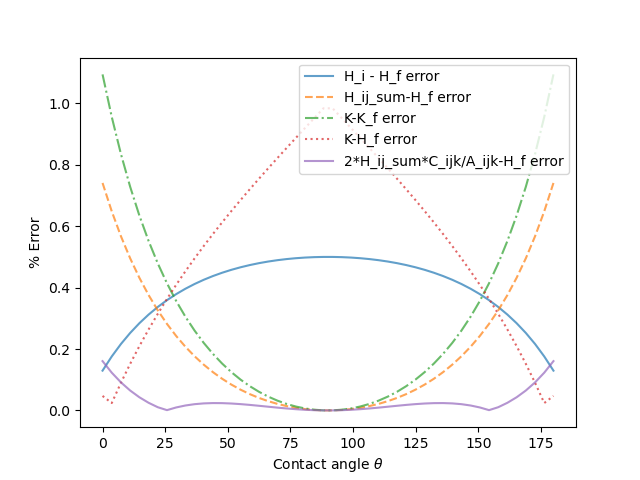

In [10]:
vdict = {'H_i - H_f error': abs(np.array(H_i) - H_f)/H_f,
         'H_ij_sum-H_f error': abs(np.array(H_ij_sum) - H_f)/H_f,
         'K-K_f error': abs(np.array(K)-K_f)/K_f,
         'K-H_f error': abs(np.array(K)-H_f)/H_f,
         '2*H_ij_sum*C_ijk/A_ijk-H_f error': abs(2*np.array(H_ij_sum)*np.array(C_ijk)/A_ijk-H_f)/H_f
         }
plot_variables(X, vdict, xlabel=r'Contact angle $\theta$', ylabel=r'% Error')

<IPython.core.display.Javascript object>


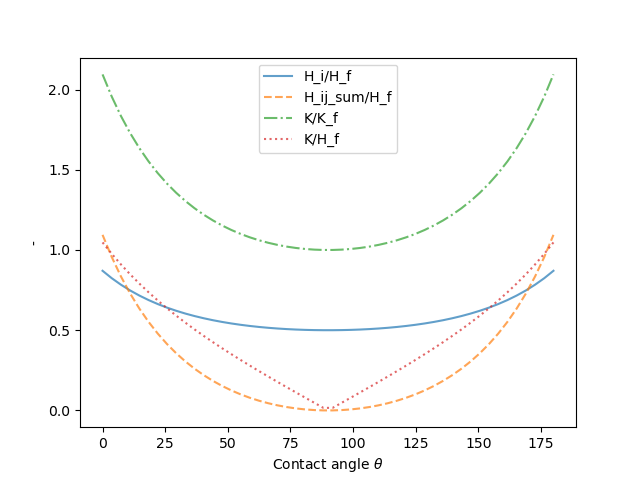

In [11]:
vdict = {'H_i/H_f': np.array(H_i)/H_f,
         'H_ij_sum/H_f': np.array(H_ij_sum)/H_f,
         'H_ij_sum/H_f': abs(np.array(K)-K_f)/K_f,
         'K/K_f': np.array(K)/K_f,
         'K/H_f': np.array(K)/H_f
         }
plot_variables(X, vdict, xlabel=r'Contact angle $\theta$', ylabel='-')

<IPython.core.display.Javascript object>


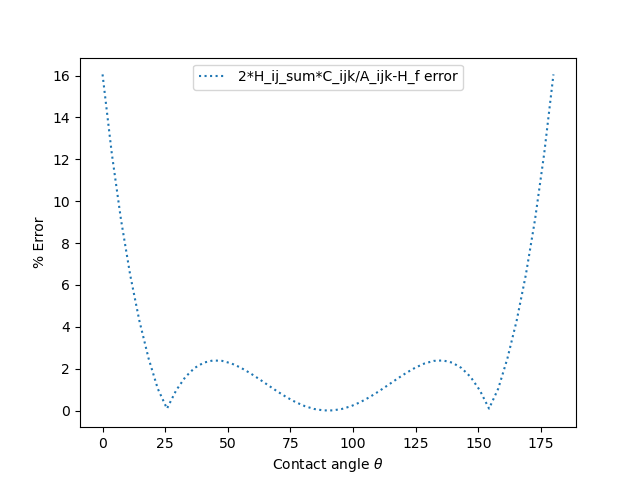

In [12]:
plot.figure()
plot.plot(THETA*180/np.pi, 100*abs(2*np.array(H_ij_sum)*np.array(C_ijk)/A_ijk-H_f)/H_f, linestyle=':', label='2*H_ij_sum*C_ijk/A_ijk-H_f error')
plot.xlabel(r'Contact angle $\theta$')
plot.ylabel(r'% Error')
plot.legend()

<IPython.core.display.Javascript object>


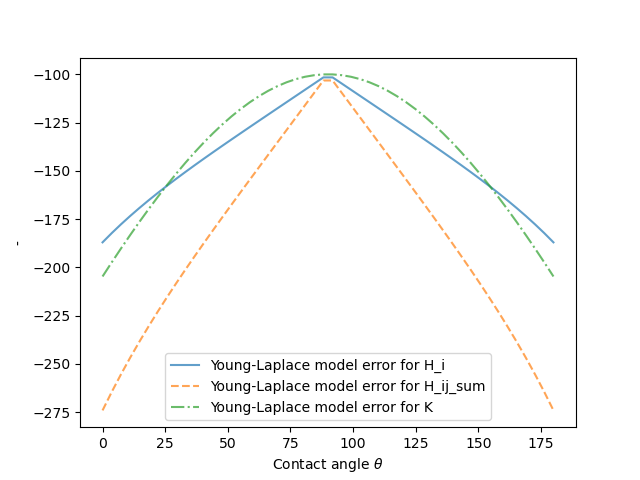

In [21]:
vdict = {'Young-Laplace model error for H_i': abs(gamma*H_i - dp_exact)/dp_exact *100,
         'Young-Laplace model error for H_ij_sum': abs(gamma*H_ij_sum - dp_exact)/dp_exact *100,
         'Young-Laplace model error for K': abs(gamma*np.array(K) - dp_exact)/dp_exact *100,
         }
plot_variables(X, vdict, xlabel=r'Contact angle $\theta$')

Previous
===

In [14]:
100*abs(2*np.array(H_ij_sum)*np.array(C_ijk)/A_ijk-H_f)/H_f

array([1.60559668e+01, 1.22950058e+01, 9.13117512e+00, 6.48571629e+00,
       4.29265090e+00, 2.49601920e+00, 1.04772087e+00, 9.41885635e-02,
       9.66850811e-01, 1.60368200e+00, 2.03522727e+00, 2.28982995e+00,
       2.39414127e+00, 2.37348854e+00, 2.25211430e+00, 2.05329629e+00,
       1.79935718e+00, 1.51157400e+00, 1.20999972e+00, 9.13212935e-01,
       6.38015308e-01, 3.99100434e-01, 2.08720059e-01, 7.63747898e-02,
       8.55514491e-03, 8.55514491e-03, 7.63747898e-02, 2.08720059e-01,
       3.99100434e-01, 6.38015308e-01, 9.13212935e-01, 1.20999972e+00,
       1.51157400e+00, 1.79935718e+00, 2.05329629e+00, 2.25211430e+00,
       2.37348854e+00, 2.39414127e+00, 2.28982995e+00, 2.03522727e+00,
       1.60368200e+00, 9.66850811e-01, 9.41885635e-02, 1.04772087e+00,
       2.49601920e+00, 4.29265090e+00, 6.48571629e+00, 9.13117512e+00,
       1.22950058e+01, 1.60559668e+01])

<IPython.core.display.Javascript object>


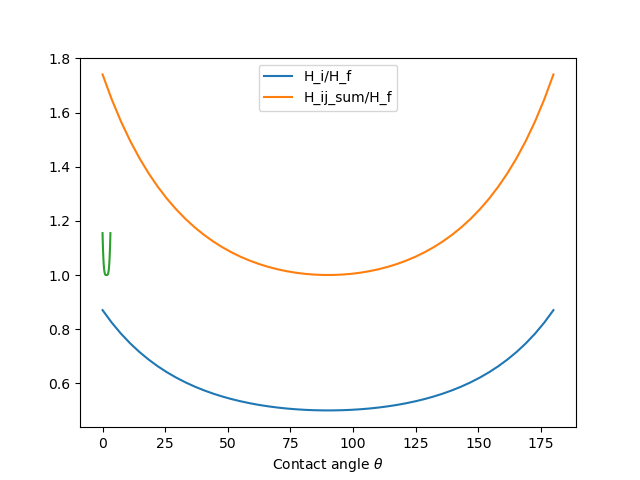

In [15]:
plot.figure()
plot.plot(THETA*180/np.pi, np.array(H_i)/H_f, label='H_i/H_f')
plot.plot(THETA*180/np.pi, np.array(H_ij_sum)/H_f, label='H_ij_sum/H_f')
#plot.plot(THETA*180/np.pi, np.array(HNdA_ij_sum)/H_f, label='HNdA_ij_sum')
plot.xlabel(r'Contact angle $\theta$')
plot.legend()

In [16]:
THETA = np.linspace(0, np.pi)  # (radian, angle from 0 to 180 deg)
#THETA = np.linspace(0, np.pi/4.0)  # (radian, angle from 0 to 180 deg)
Hlist = []
Hn_list = []
Area_list = []
Area_rec_list = []
pij_list = []
lap_j_list = []
R_list = []
z_list = []
for theta in THETA:
    r = 1  # 1 mm radius of tube
    R = r / np.cos(theta)  # = R at theta = 0
    R_list.append(R)
    H_f = 1/R + 1/R
    dp_exact = 2 * gamma / R # Pa      # Young-Laplace equation  dp = - gamma * H_f = - gamma * (1/R1 + 1/R2)
    # Jurin's law
    h = 2 * gamma * np.cos(theta) / (rho * g * r)
    
    # Let the reference vertex have a function value of zero
    y = R - R*np.sin(theta)#/2  This is the height of the boundary contact above the meniscus in m

    alpha_j = np.pi/4  # 45 degrees (square)
    beta_j = np.pi/4  # 45 degrees (square)
    # Area of rectangle plane (from pathagorean theorom)
    Area_rec = (np.sqrt(r**2 + r**2))**2  # edge = np.sqrt(R**2 + R**2)
    Area_rec_list.append(Area_rec)
    Area_plane = Area_rec
    
    """NOTE: BAD CLOSE TO theta 0.0, GOOD CLOSE TO theta 90.0"""
    # Compute the area of a theta =/= 0 surface using Heron's formula
    # Note that the area above is only true with our octahedron approximation
    y = R - R*np.sin(theta)#/2  This is the height of the boundary contact above the meniscus in m
       
    theta_z = np.arctan(y/r)
    z = y / np.sin(theta_z)
    z_list.append(z)
            
    pij = y #z  # = p_j - p_i
    pij_list.append(pij)
    a, b = z, z 
    c = np.sqrt(r**2 + r**2)
    s = (a + b + c)/2
    #Area_triangle = np.sqrt(s*(s - a)*(s - b)*(s - c)) /2
    Area_triangle = np.sqrt(s*(s - a)*(s - b)*(s - c))
    Area_rec = Area_triangle * 4    # 4 in triangles in the lower triangulation
    #Area_rec = Area_rec#*2
    d = (-a**2 + b**2 + c**2)/(2*c)
    h = np.sqrt(b**2 - d**2)
    alpha_j = np.arcsin(h/z)
    beta_j = alpha_j 
    """"""

    Area_list.append(Area_rec)
    # Cotan forumla:
    lap_j = ((cotan(alpha_j) + cotan(beta_j)) * -pij)
    lap_j_list.append(lap_j)
    H = 0.5 * (4 * lap_j)  # Mean cuvature change at bottom vertex
   # H = 0.0
    #Hn = H / Area_rec  # Normalize the curvature to the to area of the vertex star domain
    #Hn = H #/ (Area_rec/Area_plane)#**(1/R)
    #Hn =   H / Area_plane # """NOTE: GOOD CLOSE TO theta 0.0"""
    #Hn =  0.5* H / Area_plane * (Area_rec/Area_plane) # """NOTE: GOOD CLOSE TO theta 90.0"""
    #Hn =   H / Area_plane * (Area_rec/Area_plane) # Same result as using plane alpha_beta
    #Hn =   H / np.sin(theta_z) / Area_plane
    #Hn =   H / (np.sqrt(np.array(z)))  # Normalize to vector?
    Hn =   H / (np.sqrt(np.array(z/r))) /r**2 # Normalize to vector?
    Hlist.append(-H/H_f)
    Hn_list.append(-Hn/H_f)
    print(f'Error % at theta= {theta * 180.0 / np.pi} deg =  abs(dp - dp_exact)/dp_exact*100 = {abs(-Hn * gamma - dp_exact)/dp_exact *100}')
    print(f' alpha_j = {alpha_j} vs {np.pi/4}')
    #print(f'H = {H}')
    
from matplotlib import pyplot as plot
#plot.plot(THETA, Flist)
Area_list = np.array(Area_list)
Hlist = np.array(Hlist)
#plot.plot(THETA, np.array(Area_list))
plot.plot(THETA, np.array(Hlist))
Hlist

Error % at theta= 0.0 deg =  abs(dp - dp_exact)/dp_exact*100 = 2.9016456585352204
 alpha_j = 1.0471975511965974 vs 0.7853981633974483
Error % at theta= 3.6734693877551017 deg =  abs(dp - dp_exact)/dp_exact*100 = 3.35996190538082
 alpha_j = 1.0288914387450183 vs 0.7853981633974483
Error % at theta= 7.346938775510203 deg =  abs(dp - dp_exact)/dp_exact*100 = 3.704600142551174
 alpha_j = 1.0110068652520396 vs 0.7853981633974483
Error % at theta= 11.020408163265305 deg =  abs(dp - dp_exact)/dp_exact*100 = 3.9457711161397078
 alpha_j = 0.9935708213257688 vs 0.7853981633974483
Error % at theta= 14.693877551020407 deg =  abs(dp - dp_exact)/dp_exact*100 = 4.092969583460944
 alpha_j = 0.9766113746356369 vs 0.7853981633974483
Error % at theta= 18.36734693877551 deg =  abs(dp - dp_exact)/dp_exact*100 = 4.155161254656696
 alpha_j = 0.9601576428856465 vs 0.7853981633974483
Error % at theta= 22.04081632653061 deg =  abs(dp - dp_exact)/dp_exact*100 = 4.140937898729787
 alpha_j = 0.9442397464603687 vs 

array([1.15470054, 1.13154549, 1.11121371, 1.09340634, 1.07786277,
       1.06435341, 1.05267405, 1.04264115, 1.0340881 , 1.02686218,
       1.02082214, 1.0158363 , 1.01178111, 1.00854011, 1.00600332,
       1.00406693, 1.00263332, 1.00161135, 1.00091691, 1.0004736 ,
       1.00021361, 1.00007859, 1.00002054, 1.00000267, 1.00000003,
       1.00000003, 1.00000267, 1.00002054, 1.00007859, 1.00021361,
       1.0004736 , 1.00091691, 1.00161135, 1.00263332, 1.00406693,
       1.00600332, 1.00854011, 1.01178111, 1.0158363 , 1.02082214,
       1.02686218, 1.0340881 , 1.04264115, 1.05267405, 1.06435341,
       1.07786277, 1.09340634, 1.11121371, 1.13154549, 1.15470054])

In [17]:
4*10*1.1**35

1124.097473922573

In [18]:
65-30

35

<IPython.core.display.Javascript object>


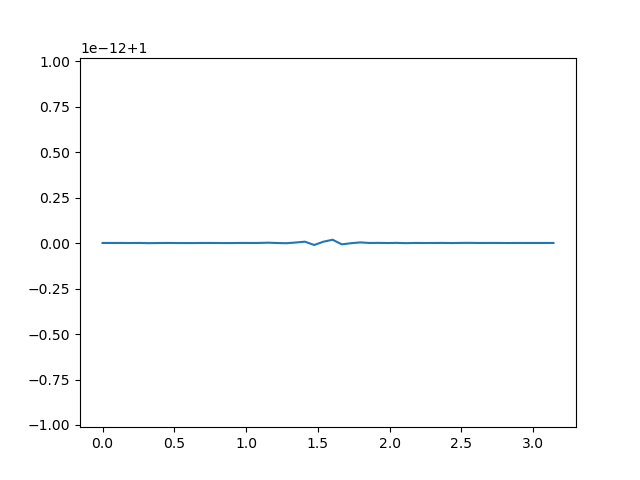

In [19]:
plot.figure()
plot.plot(THETA, np.array(Hlist)/C_ijk)

In [20]:
H

2.3094010767585047